In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from google.colab import files
import json
from sklearn.preprocessing import LabelEncoder

##1.classify by DenseNN

In [ ]:
# 讀檔
trf = open("Shopee_training_ckipseg_v2_OK.json", "r", encoding='UTF-8')
fdoc = trf.read()
training_set = json.loads(fdoc) #資料為JSON格式純文字字串，
training_set[0]['description_wseg'] #此行僅用來確認執行結果正確，可刪去

'# 呼吸 #SUM 37 ° # 安瓶 # 補水 # 驚喜 水份 # 韓國 # 代購 # 人氣 # 孕婦 # 敏感 肌 # 眼霜 # 正 韓 # 純 天然 # 無 添加 # 甦秘\n\n拒絕 仿冒 假 貨 ‼ ️\n請 支持 兔兔 🐰 韓國 直 送到 府 服務 🇰 🇷 ✈ ️\n\n\n\n🐰 🇰 🇷 【 韓國 現貨 直 送到 府 】 呼吸 SU:M 37 甦秘 水分 驚喜 高效 補 水 玻 尿酸 眼霜 活水 潤澤 亮采 眼膠 35 ml 💓 🐰 CJ 金兔 兔 韓 代購\n\n🌹 有關 產品 細節 都 歡迎 聊聊 詢問 兔兔 🐰 💓\n\n韓國 專櫃 正貨 市場價 78000 韓元\n\n容量 ： 35 ml\n（ 超大 容量 ， 一般 市面 上 眼霜 皆 約 15 ml )\n\n#koreabeauty\n\n保證 正 韓 專櫃 限量 與 獨賣 商品 💓 ，\n所有 售價 近 韓國 當地 售價 ，\n給 大家 的 是 正 韓 空運 直 送到 府 的 品質 服務 🇰 🇷 ✈ ️\n真品 是 不可能 有 奇怪 的 便宜 價格 的 ‼ ️\n且 自身 還要 承擔 國際 運費 與 匯率 風險 😓 ，\n恕 無法 議價 ！ 🙏 感謝 親愛 的 顧客 理解 😊\n\n取 貨 規範 請 務必 詳閱 🐥\n\n✈️ 直 送到 府 🇰 🇷 最 快速 💯 ［10- 14 天 ］ 顧客 們 在 家 收 國際 包裹 ✈ ️ ， 請 選擇 賣 家宅 配。 ( 韓國 國際 空運 起跳價 為 0.5 kg- 460 元 ， 金兔兔 已 為 顧客 承擔 部分 運費 ）\n\n🍀 集貨 省郵 🇰 🇷 較 慢 一點 🎈 ［ 15 - 30 天 ］ 💞 賣場 每 月 為 大家 集貨 ～ 再 出貨 至 台灣 便利商店 🚛 請 選擇 所 需 的 店 到 店 取 貨 💓\n\n🎉 直 送到 府 免 國際 運費 條件 ： 賣場 消費 總金額 達 新台幣 8888 元 ， 即可 免 國際 運費 💓'

In [ ]:
# 轉為numpy array的型態
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
total_train_examples = [t['description_wseg'].replace('\n',' ') for t in training_set] #使用description_wseg當data
total_train_examples = np.array(total_train_examples)

# 使用catid當label, 共19類
total_train_labels = [t['catid'] for t in training_set]
le = LabelEncoder()
le.fit(total_train_labels) #會以提供陣列裡所有出現過的字串來編號
train_list_enc = le.transform(total_train_labels) #轉換成編號
# 將編號轉成one-hot encoding
total_train_labels = tf.keras.utils.to_categorical(train_list_enc)
print(total_train_labels)

print(type(total_train_labels))
train_examples, val_examples, train_labels, val_labels = train_test_split(total_train_examples, total_train_labels, train_size=0.8) #把train data一部分給validation data 比例8:2
print(train_examples.shape)
print(train_labels.shape)
print(val_examples.shape)
print(val_labels.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
<class 'numpy.ndarray'>
(7592,)
(7592, 19)
(1898,)
(1898, 19)


In [ ]:
# 此行表示 word embedding 資料直接至網路下載，而且是英文的。原範例程式說明有4種英文embeddings可選擇，請參考
embed_url = "https://tfhub.dev/google/nnlm-zh-dim50/2"

# 若要使用中文 embeddings，把網址中的 nnlm-en 改成 nnlm-zh 即可
# 若要在個人電腦單機作業，請先至 Google nnlm 網頁下載 embeddings 資料，
# 再將embed_url改成電腦裡的檔案所在位置即可

hub_layer = hub.KerasLayer(embed_url, input_shape=[], dtype=tf.string, trainable=False)
hub_layer(['若要在', '個人電腦', '單機作業']) #這行測試用

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.19302525, -0.5020228 ,  0.04284242, -0.1865785 , -0.16758227,
         0.13102211,  0.12779056, -0.24750991, -0.21339764, -0.04133397,
        -0.08535179,  0.0126303 , -0.288338  , -0.247107  , -0.18289359,
        -0.06148676, -0.01710249,  0.20895806,  0.0658571 , -0.0506748 ,
        -0.43120524, -0.03434062,  0.24003816,  0.4007141 ,  0.08023057,
        -0.35393614, -0.04571268,  0.20464036, -0.13032398, -0.16506894,
        -0.1901675 ,  0.17418122,  0.14206949, -0.13718902, -0.02925662,
        -0.04303558, -0.13660856, -0.08999713,  0.4082112 , -0.1752222 ,
        -0.17788698,  0.11497898,  0.0941428 , -0.03349652, -0.21081625,
        -0.08035515,  0.09973101, -0.04571908,  0.09311295,  0.00610731],
       [ 0.28628984, -0.06572508, -0.00457937, -0.15104023,  0.03989799,
         0.05769866,  0.1188296 , -0.1818927 , -0.04000778, -0.05694438,
        -0.18512897,  0.06927223, -0.01323419, -0.1099316 , -0.28296018,
 

In [ ]:
# Dense Net
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
#model.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(19, activation='softmax'))
model.summary() #顯示每層的資訊

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48558850  
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

In [ ]:
# training
model.compile(optimizer = 'adam',
       loss = tf.losses.CategoricalCrossentropy(from_logits=True),
       metrics = [tf.metrics.CategoricalAccuracy()])
# 注意範例中 imdb_reviews 只有 0/1 兩種 labels，而作業的 labels 有 19 種
# 參數中 loss function 需由 BinaryCrossentropy 改成 CategoricalCrossentropy
# 參數中 metrics 需由 BinaryAccuracy 改成 CategoricalAccuracy

In [ ]:
history = model.fit(train_examples,
           train_labels,
           epochs = 100,
           batch_size = 512,
           validation_data = (val_examples, val_labels),
           verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 3s 36ms/step - loss: 3.0103 - categorical_accuracy: 0.0609 - val_loss: 2.9517 - val_categorical_accuracy: 0.0569
Epoch 2/100
15/15 [==============================] - 0s 19ms/step - loss: 2.9551 - categorical_accuracy: 0.0630 - val_loss: 2.9362 - val_categorical_accuracy: 0.0590
Epoch 3/100
15/15 [==============================] - 0s 19ms/step - loss: 2.9387 - categorical_accuracy: 0.0692 - val_loss: 2.9294 - val_categorical_accuracy: 0.0632
Epoch 4/100
15/15 [==============================] - 0s 19ms/step - loss: 2.9265 - categorical_accuracy: 0.0751 - val_loss: 2.9227 - val_categorical_accuracy: 0.1096
Epoch 5/100
15/15 [==============================] - 0s 19ms/step - loss: 2.9079 - categorical_accuracy: 0.0857 - val_loss: 2.9148 - val_categorical_accuracy: 0.1344
Epoch 6/100
15/15 [==============================] - 0s 20ms/step - loss: 2.8972 - categorical_accuracy: 0.0964 - val_loss: 2.9063 - val_categorical_accuracy: 0.1396
Epoch 7/100
15/1

In [ ]:
# 以下繪製訓練過程中 loss 變化及 accuracy 變化
history_dict = history.history
# history_dict.keys()
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

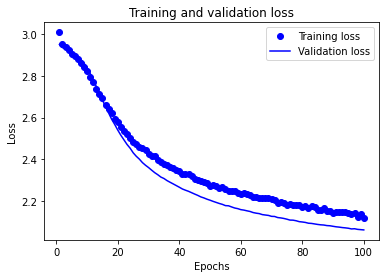

In [ ]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

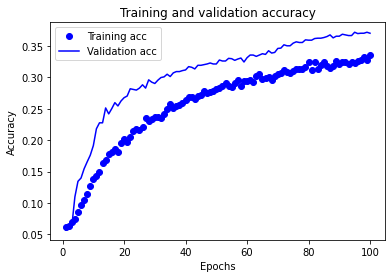

In [ ]:
plt.clf() #clear figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##2.add an embedding layer, classify by biLSTM





In [ ]:
# 請寫一段程式決定 train_examples 中最長的句子的詞數 max_doc_length 。若不會寫，直接設為 256
max_doc_length = 256
# 請寫一段程式決定 train_labels 中 labels 種類數 label_total 。若不會寫，直接設為 19
label_total = 19

In [ ]:
VOCAB_SIZE = 1000 #只取出現頻率最高的前 1000 個詞當做分類線索，其餘詞視為未知詞 (OOV, out-of-vocabulary)
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(output_sequence_length = max_doc_length, 
                                     max_tokens = VOCAB_SIZE)
encoder.adapt(train_examples)
vocab = encoder.get_vocabulary()
print(len(vocab))
vocab[:20]

1000


['',
 '[UNK]',
 '，',
 '的',
 '、',
 '。',
 '：',
 '請',
 '有',
 '商品',
 '不',
 '可',
 'cm',
 '一',
 '使用',
 '！',
 '是',
 '尺寸',
 '會',
 '在']

In [ ]:
model = tf.keras.Sequential()
model.add(encoder)
model.add(tf.keras.layers.Embedding(
     input_dim = len(vocab)+2, #+2是因為 OOV
     output_dim = 64,
     mask_zero = True)) #Use masking to handle the variable sequence lengths
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(label_total, activation='softmax')) #output layer的神經元要有label_total個，以softmax調整輸出值
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 256)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 256, 64)           64128     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              197632    
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2

In [ ]:
# training
model.compile(optimizer = 'adam',
       loss = tf.losses.CategoricalCrossentropy(from_logits=True),
       metrics = [tf.metrics.CategoricalAccuracy()])
# 注意範例中 imdb_reviews 只有 0/1 兩種 labels，而作業的 labels 有 19 種
# 參數中 loss function 需由 BinaryCrossentropy 改成 CategoricalCrossentropy
# 參數中 metrics 需由 BinaryAccuracy 改成 CategoricalAccuracy

In [ ]:
history = model.fit(train_examples,
           train_labels,
           epochs = 100,
           batch_size = 512,
           validation_data = (val_examples, val_labels),
           verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 13s 257ms/step - loss: 2.9424 - categorical_accuracy: 0.0570 - val_loss: 2.9359 - val_categorical_accuracy: 0.0674
Epoch 2/100
15/15 [==============================] - 1s 96ms/step - loss: 2.9040 - categorical_accuracy: 0.0782 - val_loss: 2.8406 - val_categorical_accuracy: 0.0817
Epoch 3/100
15/15 [==============================] - 1s 93ms/step - loss: 2.8009 - categorical_accuracy: 0.0950 - val_loss: 2.6831 - val_categorical_accuracy: 0.1201
Epoch 4/100
15/15 [==============================] - 1s 93ms/step - loss: 2.6734 - categorical_accuracy: 0.1224 - val_loss: 2.5746 - val_categorical_accuracy: 0.1538
Epoch 5/100
15/15 [==============================] - 1s 94ms/step - loss: 2.5770 - categorical_accuracy: 0.1479 - val_loss: 2.5072 - val_categorical_accuracy: 0.1939
Epoch 6/100
15/15 [==============================] - 1s 94ms/step - loss: 2.4892 - categorical_accuracy: 0.1727 - val_loss: 2.3950 - val_categorical_accuracy: 0.2007
Epoch 7/100
15

In [ ]:
# 以下繪製訓練過程中 loss 變化及 accuracy 變化
history_dict = history.history
# history_dict.keys()
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

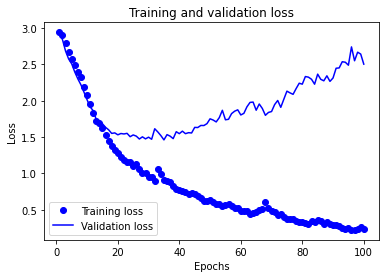

In [ ]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

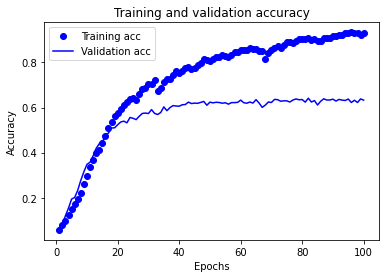

In [ ]:
plt.clf() #clear figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##3.add an embedding layer,but use pre-trained embedding model

In [ ]:
# 請寫一段程式決定 train_examples 中最長的句子的詞數 max_doc_length 。若不會寫，直接設為 256
max_doc_length = 256
# 請寫一段程式決定 train_labels 中 labels 種類數 label_total 。若不會寫，直接設為 19
label_total = 19

In [ ]:
VOCAB_SIZE = 1000 #只取出現頻率最高的前1000個詞當做分類線索，其餘詞視為未知詞(OOV, out-of-vocabulary)
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(output_sequence_length = max_doc_length, 
                                     max_tokens = VOCAB_SIZE)
encoder.adapt(train_examples)
vocab = encoder.get_vocabulary()
print(len(vocab))

1000


In [ ]:
# 轉成Embedding層的input vector
embed_data = np.zeros((2, 50))
print((embed_data.shape))
# 此行表示 word embedding 資料直接至網路下載，而且是英文的。原範例程式說明有 4 種英文 embeddings 可選擇，請參考
embed_url = "https://tfhub.dev/google/nnlm-zh-dim50/2"

# 若要使用中文 embeddings，把網址中的 nnlm-en 改成 nnlm-zh 即可

embed = hub.KerasLayer(embed_url, input_shape=[], dtype=tf.string, trainable=False)
embed_data = np.append(embed_data, embed([data for data in vocab]), axis=0)
print(embed_data.shape)

(2, 50)
(1002, 50)


In [ ]:
model = tf.keras.Sequential()
model.add(encoder)
model.add(tf.keras.layers.Embedding(input_dim = len(vocab)+2, weights = [embed_data], trainable = False, input_length = max_doc_length,output_dim = 50))
model.add(tf.keras.layers.Conv1D(128, 5, activation='sigmoid'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv1D(64, 5, activation='sigmoid'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv1D(32, 5, activation='sigmoid'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(label_total, activation='softmax')) #output layer的神經元要有label_total個，以softmax調整輸出值
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 256)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 256, 50)           50100     
                                                                 
 conv1d_3 (Conv1D)           (None, 252, 128)          32128     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 50, 128)          0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 50, 128)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 46, 64)           

In [ ]:
# training
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt,
       loss = tf.losses.CategoricalCrossentropy(from_logits=True),
       metrics = [tf.metrics.CategoricalAccuracy()])
# 注意範例中 imdb_reviews 只有 0/1 兩種 labels，而作業的 labels 有 19 種
# 參數中 loss function 需由 BinaryCrossentropy 改成 CategoricalCrossentropy
# 參數中 metrics 需由 BinaryAccuracy 改成 CategoricalAccuracy

In [ ]:
history = model.fit(train_examples,
           train_labels,
           epochs = 100,
           batch_size = 1024,
           validation_data = (val_examples, val_labels),
           verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 2s 169ms/step - loss: 3.0543 - categorical_accuracy: 0.0522 - val_loss: 2.9496 - val_categorical_accuracy: 0.0490
Epoch 2/100
8/8 [==============================] - 1s 116ms/step - loss: 2.9511 - categorical_accuracy: 0.0533 - val_loss: 2.9450 - val_categorical_accuracy: 0.0516
Epoch 3/100
8/8 [==============================] - 1s 115ms/step - loss: 2.9456 - categorical_accuracy: 0.0528 - val_loss: 2.9454 - val_categorical_accuracy: 0.0516
Epoch 4/100
8/8 [==============================] - 1s 114ms/step - loss: 2.9449 - categorical_accuracy: 0.0526 - val_loss: 2.9456 - val_categorical_accuracy: 0.0479
Epoch 5/100
8/8 [==============================] - 1s 116ms/step - loss: 2.9445 - categorical_accuracy: 0.0539 - val_loss: 2.9458 - val_categorical_accuracy: 0.0479
Epoch 6/100
8/8 [==============================] - 1s 114ms/step - loss: 2.9445 - categorical_accuracy: 0.0511 - val_loss: 2.9458 - val_categorical_accuracy: 0.0479
Epoch 7/100
8/8 [=====

In [ ]:
# 以下繪製訓練過程中 loss 變化及 accuracy 變化
history_dict = history.history
# history_dict.keys()
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

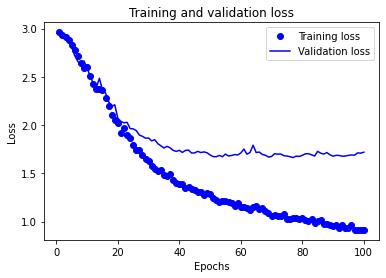

In [ ]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

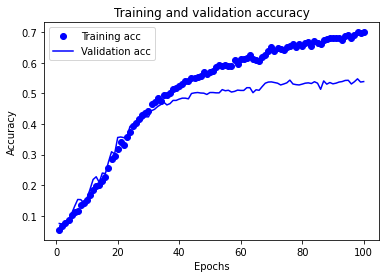

In [ ]:
plt.clf() #clear figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()